### **1. Import necessary libraries.**

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

### **2. Load and preprocess the data.**

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print shape of training data
print(x_train.shape, y_train.shape)

# Reshape the data to include a single color channel (grayscale)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)


### **3. Initializing Parameters.**

In [4]:
input_shape = (28, 28, 1)
epochs = 10
batch_size = 64
num_classes = 10
model_name = 'digit_recog_mnist_cnn.keras'

### **4. Build the CNN Model.**

In [5]:
# Build the CNN model
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

# Fully Connected Layer 1
model.add(layers.Dense(128, activation='relu'))

# Dropout Layer 1
model.add(layers.Dropout(0.2))

# Fully Connected Layer 2
model.add(layers.Dense(64, activation='relu'))

# Dropout Layer 2
model.add(layers.Dropout(0.3))

# Output layer (10 classes for digit recognition)
model.add(layers.Dense(num_classes, activation='softmax')) #num_classes=10

# Summary of the model architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

### **5. Compile the Model.**

In [6]:
# Compile the model
# Use a learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### **6. Train the Model.**

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=1)
print("The model has successfully trained")

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 60ms/step - accuracy: 0.8247 - loss: 0.5403 - val_accuracy: 0.9823 - val_loss: 0.0543
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9780 - loss: 0.0757 - val_accuracy: 0.9888 - val_loss: 0.0345
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 62ms/step - accuracy: 0.9855 - loss: 0.0517 - val_accuracy: 0.9874 - val_loss: 0.0408
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 59ms/step - accuracy: 0.9885 - loss: 0.0411 - val_accuracy: 0.9906 - val_loss: 0.0320
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.9902 - loss: 0.0343 - val_accuracy: 0.9921 - val_loss: 0.0276
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 61ms/step - accuracy: 0.9919 - loss: 0.0289 - val_accuracy: 0.9918 - val_loss: 0.0284
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 59ms/step - accuracy: 0.9925 - loss: 0.0244 - val_accuracy: 0.9925 - val_loss: 0.0290
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 58ms/step - accuracy: 0.9942 - loss: 0.0211 - 

### **7. Evaluate the Model.**

In [8]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Test accuracy: {test_acc * 100:.2f}%")
print(f"Test loss: {test_loss * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9880 - loss: 0.0450
Test accuracy: 99.07%
Test loss: 3.33%


### **8. Save the Model.**

In [9]:
model.save(model_name)
print(f"Saving the model as: {model_name}")

Saving the model as: digit_recog_mnist_cnn.keras


### **9. Plotting the Training History.**

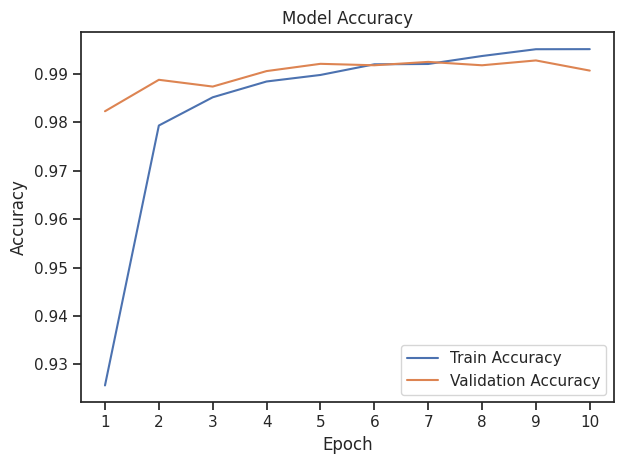

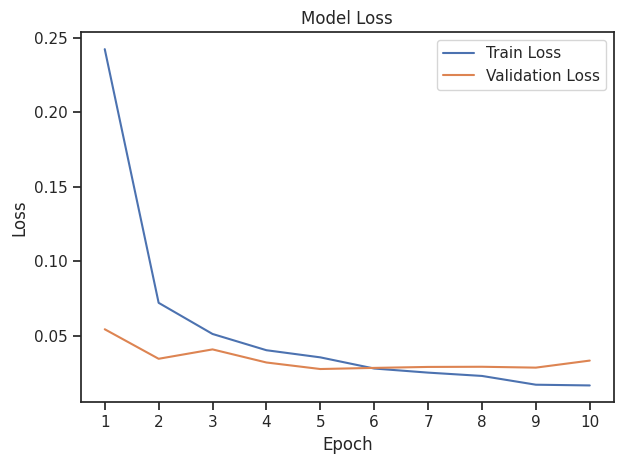

In [10]:
epochs_range = range(1, epochs + 1)

# Create a DataFrame for accuracy
accuracy_data = pd.DataFrame({
    'Epoch': epochs_range,
    'Train Accuracy': history.history['accuracy'],
    'Validation Accuracy': history.history['val_accuracy']
})

# Plot training & validation accuracy
sns.set(style="ticks")  # Set Seaborn style
sns.lineplot(x='Epoch', y='value', hue='variable',
             data=pd.melt(accuracy_data, ['Epoch']),
             markers=True)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs_range)
plt.legend(title='', loc='lower right')
plt.tight_layout()
plt.show()

# Create a DataFrame for loss
loss_data = pd.DataFrame({
    'Epoch': epochs_range,
    'Train Loss': history.history['loss'],
    'Validation Loss': history.history['val_loss']
})

# Plot training & validation loss
sns.lineplot(x='Epoch', y='value', hue='variable',
             data=pd.melt(loss_data, ['Epoch']),
             markers=True)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs_range)
plt.legend(title='', loc='upper right')
plt.tight_layout()
plt.show()

### **10. Prediction and Classification Report.**

In [11]:
# Predciting the encoded label
y_pred_encoded = model.predict(x_test)

# Decoding the predicted label
y_test_pred = [np.argmax(i) for i in y_pred_encoded]

# Decoding the actual label
y_test_actual = [np.argmax(i) for i in y_test]

print(f"Predicted label of first test data: {y_test_pred[0]}")
print(f"Actual label of first test data: {y_test_actual[0]}")

print(classification_report(y_test_actual, y_test_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Predicted label of first test data: 7
Actual label of first test data: 7
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### **11. Confusion Matrix.**

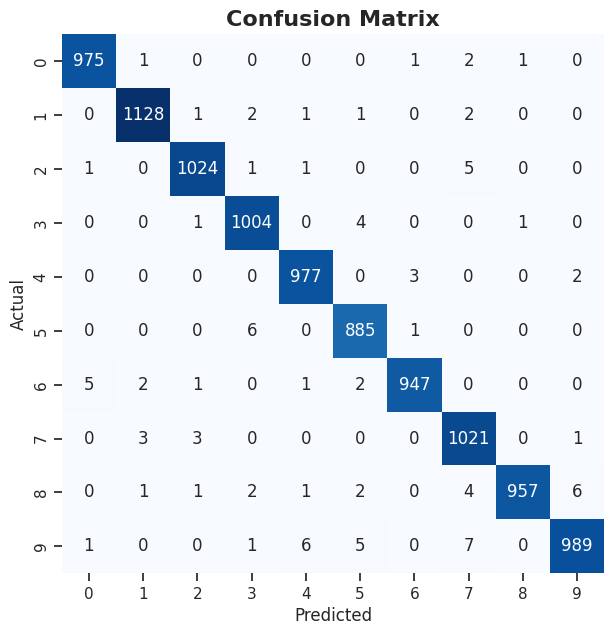

In [12]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_test_actual, y_test_pred), annot=True,
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='center', fontsize=16, fontweight="bold")
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

### **12. Showing Predicted Labels.**

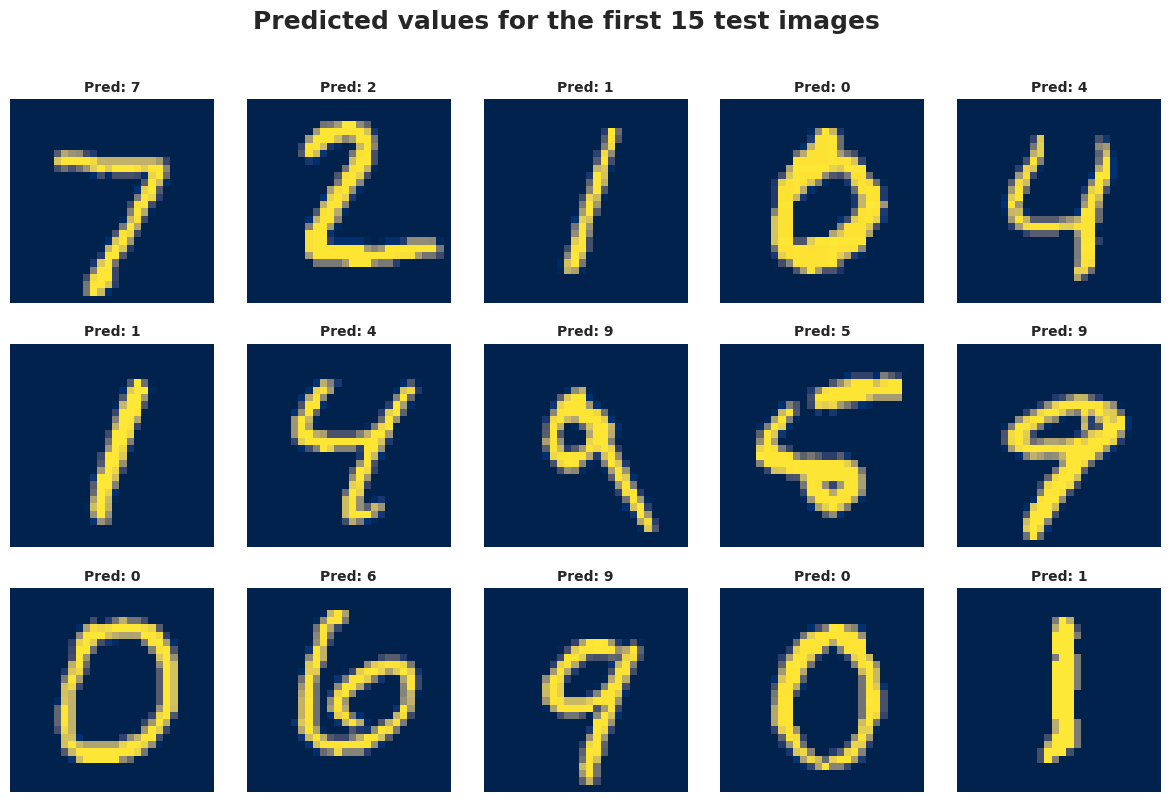

In [21]:
# Plot the first 15 test images with their predicted labels
fig = plt.figure(figsize=(15, 9))  # Set overall figure size

for ind in range(15):
    ax = plt.subplot(3, 5, ind + 1)  # Create a 3x5 grid of subplots
    ax.set_title(f"Pred: {y_test_pred[ind]}", fontsize=10, fontweight="bold")  # Predicted label
    ax.axis('off')  # Turn off the axis
    plt.imshow(x_test[ind], cmap='cividis')  # Plot the image

# Add a suptitle for the entire figure
fig.suptitle('Predicted values for the first 15 test images', fontsize=18, fontweight="bold")

# Adjust spacing between subplots for better readability
plt.subplots_adjust(wspace=0.1, hspace=0.2)  # Increase width and height spacing
plt.show()
